# Lesson: Regression - EXPLORATION

<a href = "https://www.canva.com/design/DAFiFa1HOKY/uQ-ZPCWBYYjgONgjHzY9hg/view?utm_content=DAFiFa1HOKY&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">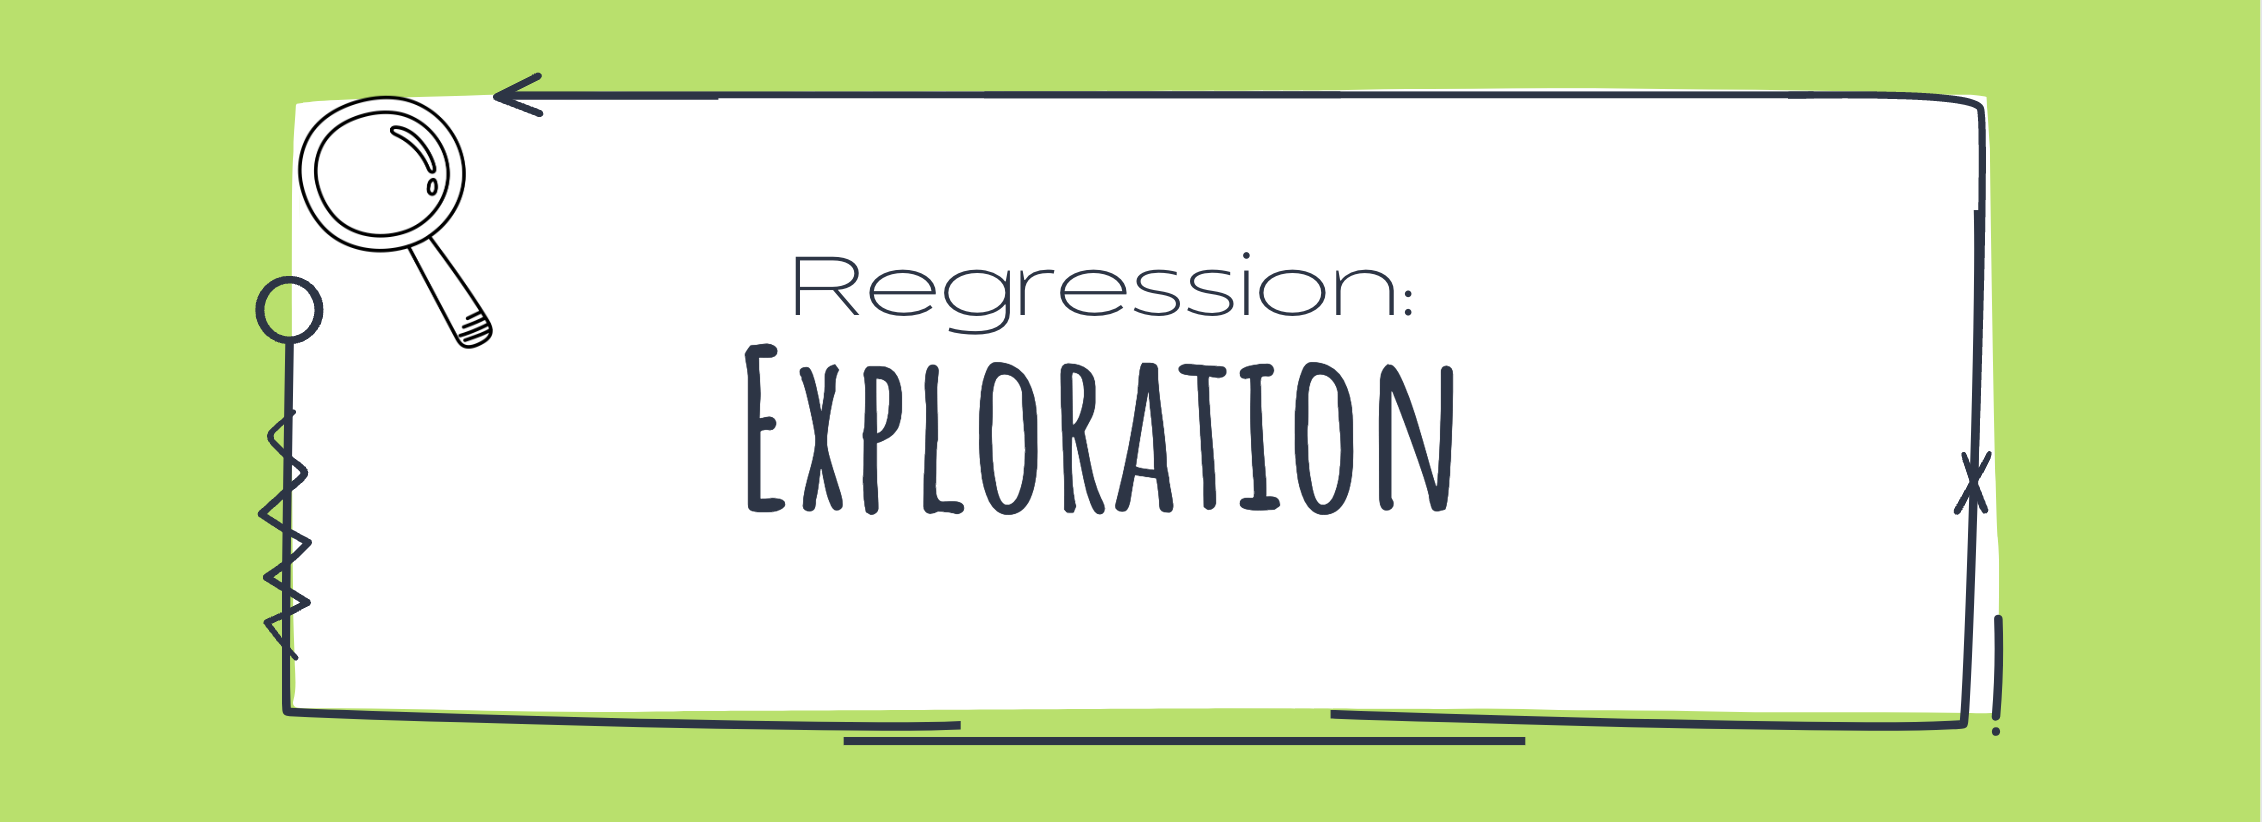</a>

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

> ##### "Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses, and to check assumptions with the help of summary statistics and graphical representations." - Prasad Patil



<hr style="border:2px solid gray">

## Data Wrangling

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro 

#my wrangle file
import wrangle as w

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Use our function from wrangle to acquire and prepare our data.

df = w.wrangle_exams()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [4]:
# Check if student_id 's  are unique

df.student_id.nunique()

102

___

## Types of Visualizations

Here is a breakdown of visualizations by type with some useful code snippets. Below, let's use the appropriate visualizations on our `student_grades` dataset.
### 1. Univariate Distributions
Check out the distributions of a single variable at a time, using pandas built-in plotting function to create a histogram or Seaborn `displot`, `boxplot`, or `countplot`.

#### a. Continuous variable distributions
 >```python
 >df.[col].hist(grid=False, bins=10)
 >
 >sns.displot(x, data)
 >
 >sns.boxplot(data)
 >```

#### b. Discrete variable distributions
 >```python
 >sns.countplot(x='discrete_var', data)
 >```

<br>
<br> 
 
### 2. Bi-/Multi-Variate Comparisons

#### a. Continuous vs. Continuous
>```python
>sns.lineplot(data, x, y)
>
>sns.scatterplot(data, x, y)
>```
    
- Seaborn `pairplot` to create a scatter matrix visualizing all continuous variable relationships along with individual distributions.
    >```python
    >sns.pairplot(data)
    >```

- Seaborn `relplot` for a simple scatterplot of two continuous variables.
    >```python
    >sns.relplot(x, y, data, kind=scatter)
    >```

- Seaborn `lmplot` for a simple scatterplot of two continous variables with a regression line. ***You can pass a discrete variable to `col` or `hue` to bring in another dimension, too.***
    >```python
    >sns.lmplot(x, y, data, scatter=True, hue=None, col=None)
    >```

- Seaborn `jointplot` for a simple scatterplot of two continuous variables with a regression line and the addition of a histogram for each variable.
    >```python
    >sns.jointplot(x, y, data, kind=scatter)
    >```

- Seaborn `heatmap` of Correlation Coefficients for all numeric columns in a dataset. *Can also be ran on Discrete vs. Discrete*
    >```python
    >sns.heatmap(train.corr())
    >```
    
<br>    
    
#### b. Discrete vs. Continuous
- Seaborn `swarmplot` or `stripplot` to examine a discrete variable by a continuous.
    >```python
    >sns.swarmplot(x='continuous_var', y='discrete_var', data=train)
    >
    >sns.stripplot(x='continuous_var', y='discrete_var', data=train)
    >
    >sns.catplot(x='continuous_var', y='discrete_var', data=train)
    >```
    
- Seaborn `boxplot`, `violinplot`, or `barplot` to show the distribution of a continuous variable by a discrete variable.
    >```python
    >sns.boxplot(x='discrete_var', y='continuous_var', data=train)
    >
    >sns.violinplot(x='discrete_var', y='continuous_var', data=train)
    >
    >sns.barplot(x='discrete_var', y='continuous_var', data=train)
    >```
    
    


___
## Univariate Exploration

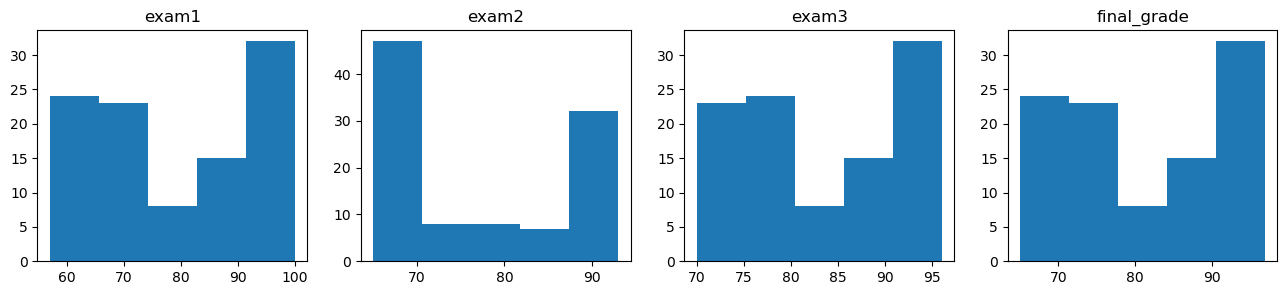

In [5]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot no.s should start at 1
    plot_number = i+1
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5)
    
    # Hide gridlines.
    plt.grid(False)
    

In [6]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.764706,78.450980,77.323529,84.215686,81.696078
std,29.988505,14.400651,10.356193,8.747987,10.998460
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,26.250000,70.000000,70.000000,78.000000,72.000000
50%,51.500000,79.000000,75.000000,85.000000,81.000000
75%,76.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


<div class="alert alert-block alert-success">

### Takeaways:
- All distributions are bimodal: There seem to be more students score on the upper & lower echleons than the mid-to-high 80s.
    
- `exam3` has the highest mean & median (50%) score
    - `exam1` & `final_grade` have similar medians
    
- `exam2` has the least students scoring in the upper half of the grade range and the most scoring in the lower half.
    
- `exam1` and `final_grade` distributions look very similar in these initial charts although `exam1` has a larger range in scores than `final_grade`.
    
- STD is decreasing over exams
</div>

___
## Split Data
##### Before we explore bi- and multi-variate relationships, we ***must*** split our data to avoid leakage of unseen data.

In [7]:
train, validate, test = w.split_data(df)


    train -> (56, 5)
    validate -> (25, 5)
    test -> (21, 5)


___
## Goal

Let's keep our goal from our student grades scenario in mind here.
> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

Since my target variable is continuous, `final_grade`, this is a regression problem. It's important to remember that Multiple linear regression analysis makes several key assumptions:

- There must be a linear relationship between the outcome variable and the independent variables.  *Scatterplots can show whether there is a linear or curvilinear relationship.*

- No Multicollinearity: Multiple regression assumes that the independent variables are not highly correlated with each other.

- Multivariate Normality: Multiple regression assumes that the residuals are normally distributed.


# Hypotheses:
## Q1. Is there a relationship between `exam1` and `final_grade`? 
- both of my variables are continuous
- check for **correlation**

- ${H_0}$: There is no linear correlation between exam1 and final_grade
- ${H_a}$:  There is a linear correlation between exam1 and final_grade

<br>



#### Visualize
##### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
- if normal, use pearsons method
- if not, use spearman  
2. Calculate the correlation coefficient for each pair of variables
- use pandas `.corr()` 
- it defaults to `method=pearson`
- can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [8]:
# We already determined that all of the columns were NOT normally distributed.

# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns='student_id').corr(method='spearman')
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.916572,0.904336,0.965044
exam2,0.916572,1.000000,0.923761,0.867712
exam3,0.904336,0.923761,1.000000,0.926712
final_grade,0.965044,0.867712,0.926712,1.000000


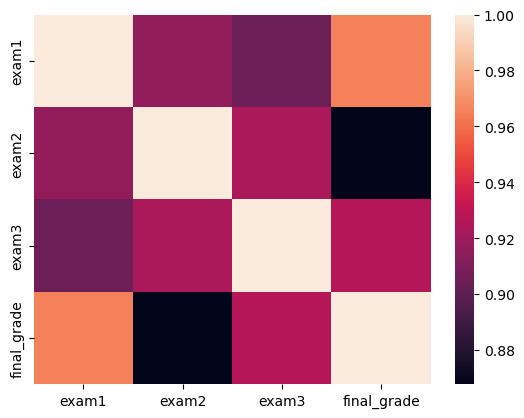

In [9]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)
plt.show()

In [10]:
# Upper triangle of an array
np.triu(exam_corr)

array([[1.        , 0.91657161, 0.90433634, 0.96504391],
       [0.        , 1.        , 0.92376074, 0.86771174],
       [0.        , 0.        , 1.        , 0.92671184],
       [0.        , 0.        , 0.        , 1.        ]])

In [11]:
# Lower triangle of an array
np.tril(exam_corr)

array([[1.        , 0.        , 0.        , 0.        ],
       [0.91657161, 1.        , 0.        , 0.        ],
       [0.90433634, 0.92376074, 1.        , 0.        ],
       [0.96504391, 0.86771174, 0.92671184, 1.        ]])

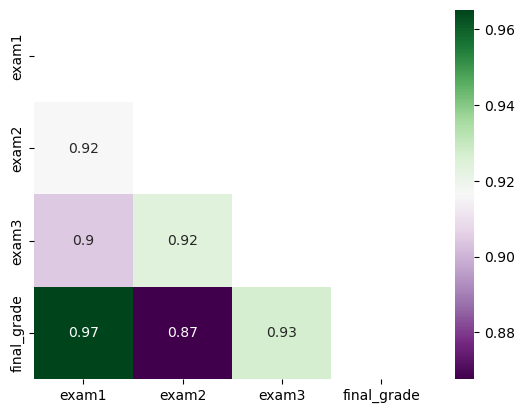

In [12]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(exam_corr, cmap='PRGn', annot=True,
           mask=np.triu(exam_corr))
plt.show()

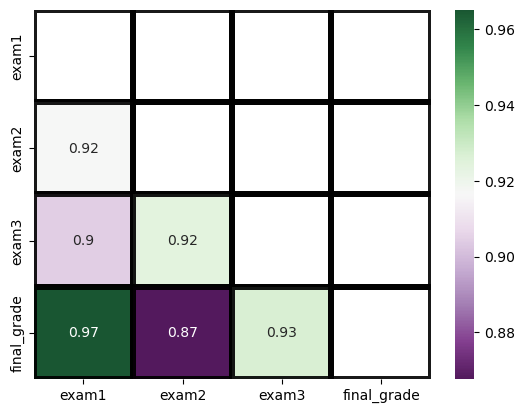

In [14]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 

kwargs= {'alpha': .9,
         'linewidth': 3,
         'linestyle':'-',
         'linecolor': 'black'}

sns.heatmap(exam_corr, cmap='PRGn', annot=True,
           mask=np.triu(exam_corr), **kwargs)
plt.show()

#### Hypothesis Testing

In [15]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 

r,p = spearmanr(train.exam1, train.final_grade)

In [16]:
w.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.965044
P-value: 4.413503536961622e-33


<div class="alert alert-block alert-success">

##### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` have the highest r. This looks to be the best predictor of our target variable.
    
- Based on my correlation coefficient and my p-value, **We reject H₀, there is a monotonic relationship between `exam1` and `final_grade`.**
    
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
    
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.
    
    </div>

___
## What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

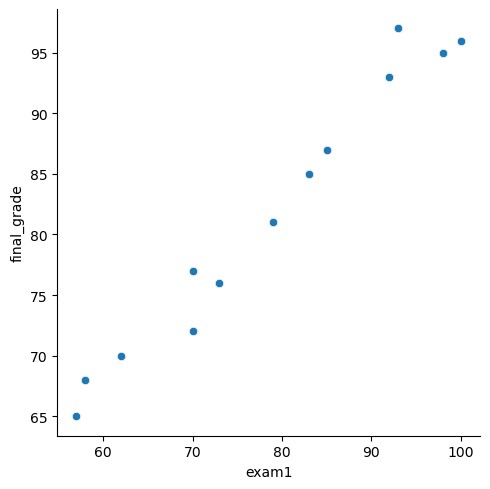

In [18]:
sns.relplot(data=train, x='exam1', y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

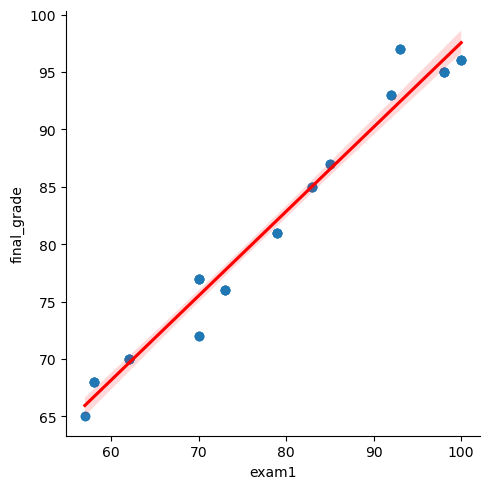

In [19]:
sns.lmplot(data=train, x='exam1', y='final_grade',
          line_kws={'color':'red'})
plt.show()

<div class="alert alert-block alert-info">
    
##### Confidence Interval: 
This is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence. 
    
    
Confidence, in statistics, is another way to describe probability.
</div>

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

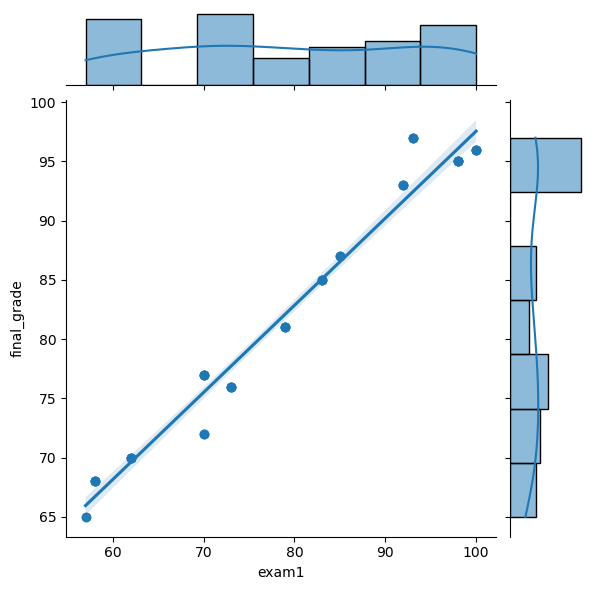

In [20]:
sns.jointplot(data=train, x='exam1', y='final_grade',
             kind='reg')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

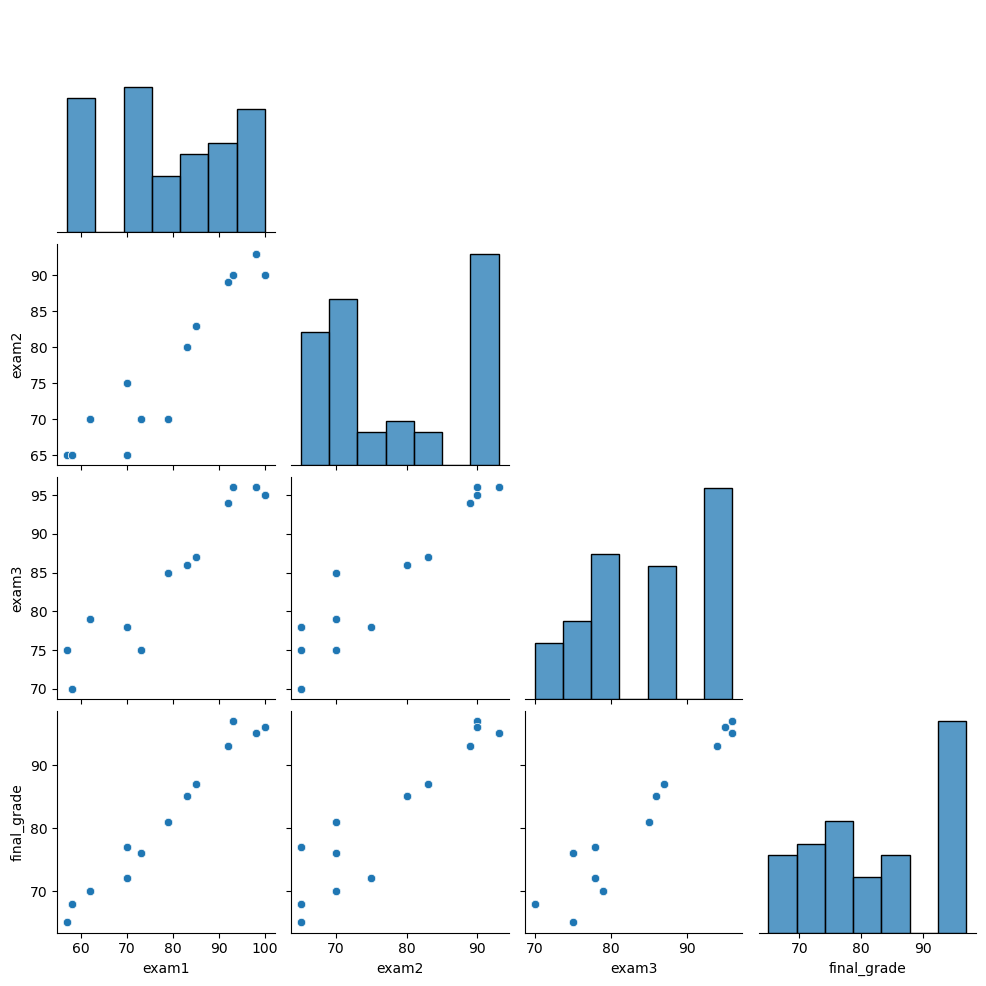

In [21]:
sns.pairplot(data=train.drop(columns='student_id'), corner=True)
plt.show()

<div class="alert alert-block alert-success">
    
##### Takeways:
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a monotonic relationship between `exam1` and `final_grade`.
    
- My `pairplot` shows me that there are monotonic relationships between the other exams scores, as well 
</div>

___
## Q2: Is there a cutoff grade that makes sense to investigate? Passing/failing/letter grades?

In [22]:
#number of people who failed each test
for col in train.columns[1:]:
    print(f'On {col}, {(train[col]<70).sum()} students failed.')

On exam1, 12 students failed.
On exam2, 12 students failed.
On exam3, 0 students failed.
On final_grade, 7 students failed.


### Make categorical values for further exploration

In [24]:
#assign fail and pass for each test
for col in train.columns[1:]:
    train[col+'_pass'] = np.where((train[col]<70), 'fail', 'pass')

In [25]:
train.head()

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
49,50,58,65,70,68,fail,fail,pass,fail
22,23,62,70,79,70,fail,pass,pass,pass
55,56,83,80,86,85,pass,pass,pass,pass
91,92,100,90,95,96,pass,pass,pass,pass
79,80,98,93,96,95,pass,pass,pass,pass


### What's the relationship between passing `exam1` and the `final_grade`?

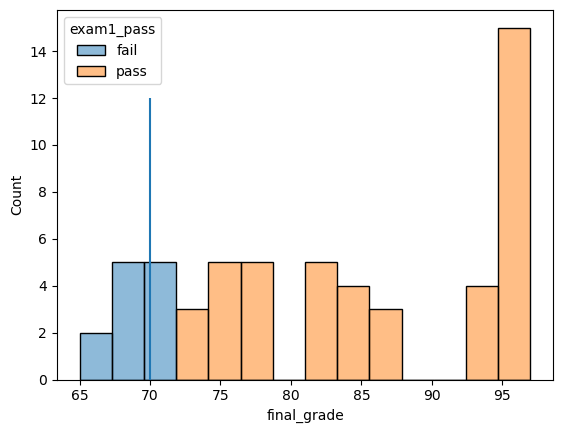

In [26]:
#seaborn histplot 
sns.histplot(data=train, x='final_grade',
            hue='exam1_pass', bins=14)

#set line for passing level
plt.vlines(70, 0, 12)
plt.show()

In [27]:
train.final_grade.mean()

82.44642857142857

In [28]:
#mean final_grade by exam1 pass/fail status
train.groupby('exam1_pass').final_grade.mean()

exam1_pass
fail    68.333333
pass    86.295455
Name: final_grade, dtype: float64

### What percentage of students failed `exam1` and the `final_grade`?

In [29]:
((train.exam1_pass == 'fail') & (train.final_grade_pass == 'fail')).mean()

0.125

### Of the students who failed `exam1`, how many also had a failing `final_grade`?

In [30]:
#create subset of people who failed exam1
fail_subset = train[train.exam1_pass=='fail']
fail_subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
49,50,58,65,70,68,fail,fail,pass,fail
22,23,62,70,79,70,fail,pass,pass,pass
101,102,58,65,70,68,fail,fail,pass,fail
9,10,62,70,79,70,fail,pass,pass,pass
88,89,58,65,70,68,fail,fail,pass,fail
61,62,62,70,79,70,fail,pass,pass,pass
74,75,62,70,79,70,fail,pass,pass,pass
37,38,57,65,75,65,fail,fail,pass,fail
48,49,62,70,79,70,fail,pass,pass,pass
11,12,57,65,75,65,fail,fail,pass,fail


In [32]:
#how many failed final
(fail_subset.final_grade_pass=='fail').sum()

7

In [33]:
#Percentage of students who failed final
(fail_subset.final_grade_pass=='fail').mean()

0.5833333333333334

### Of the students who failed `exam2`, how many also had a failing `final_grade`?

In [34]:
#create subset of people who failed exam2
e2_subset = train[train.exam2_pass=='fail']
e2_subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
49,50,58,65,70,68,fail,fail,pass,fail
101,102,58,65,70,68,fail,fail,pass,fail
73,74,70,65,78,77,pass,fail,pass,pass
86,87,70,65,78,77,pass,fail,pass,pass
34,35,70,65,78,77,pass,fail,pass,pass
88,89,58,65,70,68,fail,fail,pass,fail
37,38,57,65,75,65,fail,fail,pass,fail
99,100,70,65,78,77,pass,fail,pass,pass
11,12,57,65,75,65,fail,fail,pass,fail
47,48,70,65,78,77,pass,fail,pass,pass


In [35]:
#how many failed final
(e2_subset.final_grade_pass=='fail').sum()

7

In [36]:
#percentage who failed final
(e2_subset.final_grade_pass=='fail').mean()

0.5833333333333334

### Of the students who failed both `exam1` and `exam2`, how many also had a failing `final_grade`?

In [38]:
#create subset of people who failed exam2
e1e2_subset = train[(train.exam2_pass=='fail')
                   & (train.exam1_pass=='fail')]
e1e2_subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
49,50,58,65,70,68,fail,fail,pass,fail
101,102,58,65,70,68,fail,fail,pass,fail
88,89,58,65,70,68,fail,fail,pass,fail
37,38,57,65,75,65,fail,fail,pass,fail
11,12,57,65,75,65,fail,fail,pass,fail
62,63,58,65,70,68,fail,fail,pass,fail
36,37,58,65,70,68,fail,fail,pass,fail


In [40]:
#how many failed final
(e1e2_subset.final_grade_pass=='fail').sum()

7

In [41]:
#percentage who failed final
(e1e2_subset.final_grade_pass=='fail').mean()

1.0

<div class="alert alert-block alert-success">
    
##### Takeways:
    
- `exam1` and `exam2` have a better reflection if someone passes the `final_grade`
    
- given the multicollinearity present, we may want to just focus on one exam
    
- Given more time, we could create a new feature that captures if a student failed both `exam1` and `exam2` 
    
</div>

## Further Reading

- [Visualization with Seaborn Demos](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
- <https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15>
- <https://www.itl.nist.gov/div898/handbook/index.htm>
- <https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/>
- Boxplot vs. Violin example https://matplotlib.org/3.2.1/gallery/statistics/boxplot_vs_violin.html
- https://datavizcatalogue.com/
- [Seaborn Color Palletes] 